# BITCOIN PRICE FORECASTING PROJECT
## TIME SERIES APPROACH

Student name: Hera K.

Student pace: full time

Scheduled project review date/time: 05/26/2023

Instructor name: Daniel Burdeno


# Overview
* This project aims to forecast future bitcoin price based on historical bitcoin price data by time series approach. In time series analysis, time is a crucial variable of the data, because it shows us how the data adjusts over the course of the data points as well as the result.
* Time series is a specific way of analyzing a sequence. It can show likely changes in the data, like seasonality or cyclic behavior, which provides a better understanding of data variables and helps forecast better. 
 

# Business Problem

To come up with a long-lasting solution, the world needs innovative and robust perspective for global system. Increasing demand worldwide makes Bitcoin much more attractive, though it looks like untrusty and jeopardous venture for now. Bitcoin prices are tried to be predicted by investors or majority. Bitcoin is aspiring critical up-and-coming for future as it ensures an analytical, favorable, strategic system emerging in digitalized world. To forecast bitcoin future prices will guide for more entrepreneurs in finance world, it will be enabled to invest wisely.

# Data 

Columns in our dataframe is mentioned as below.It operates 24 hours a day nonstop.

* **Date** : Index in our time series that specifies the date associated with the price. (USD)

* **Open Price**: The first price of BTC was purchased on the trading day (USD)

* **Close Price**: The last price of BTC was purchased at the end of trading day (USD)

* **High:** The maximum price of BTC was purchased on trading day (USD)

* **Low:** The minimum price of BTC was purchased on the trading day (USD)

* **Adjusted Closing Price**: Stock exchanges witness buying and selling of millions of shares every minute. When the exchanges close, the last trading price of the stock is recorded as the closing price of the share (USD)

* **Volume**: The sum of actual trades made during the trading day (USD)

- All Time High $68,789.63 USD   in 2021-11-10
- Max Volume 350,967,941.479 USD in 2021-02-26

In [5]:
# Data manipulation 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
# Read the data from csv file
df = pd.read_csv('BTC-USD.csv',
                index_col = 'Date', parse_dates=True)

# Rename the columns 
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume':'volume'})
df

,open,high,low,close,Adj Close,volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518


# Exploration Data Analysis

In [7]:
# Check the columns are same as each other
display(df[df['close'] == df['Adj Close']].shape, df.shape)

# Drop the same columns 
df = df.drop(columns=['Adj Close'], axis=1, inplace=False)

# Display first 3 columns of head, last 3 columns of tail
display(df.head(3), df.tail(3))
display(df.info())

(3153, 6)

(3153, 6)

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700


,open,high,low,close,volume
Date,,,,,
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039063,28847.710938,15548678514
2023-05-05,28855.175781,29659.476563,28848.173828,29495.498047,17805907968


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3153 entries, 2014-09-17 to 2023-05-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3153 non-null   float64
 1   high    3153 non-null   float64
 2   low     3153 non-null   float64
 3   close   3153 non-null   float64
 4   volume  3153 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.8 KB


None

* **I have date as datetime from 2014 to 2023 years, open, high, low and close columns as float, volume as integer in our dataframe.
I have 3153 entries and total 5 columns.**

* **I will focus on historical close price for my forecasting models to predict future BTC price. It is daily prices on the dataset.** 

### I check if the duplicated columns, missing info, null info is available in the dataframe
* It looks there is no duplicated and null info 

In [8]:
# Check duplicated columns 
display(df.duplicated().sum())

# Check how many missing info, null in the dataframe
display(df.isnull().sum())

0

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
print(f"There are {df.shape[0]} records in our timeseries")

# The idxmax() method returns a Series with the index of the maximum value for each column
print(f'Maximum value for each column:\n{df.idxmax(axis=0, skipna=True)}')
      

# Check our df shape and maximum number of each column

print("Open     number of max    : {}".format(df['open'].max()))
print("Close    number of max    : {}".format(df['close'].max()))
print("High     number of max    : {}".format(df['high'].max()))
print("Low      number of max    : {}".format(df['low'].max()))
print("Volume   number of max    : {}".format(df['volume'].max()))

# Check the unique for each column
print("Open     number of unique : {}".format(df['open'].nunique()))
print("Close    number of unique : {}".format(df['close'].nunique()))
print("High     number of unique : {}".format(df['high'].nunique()))
print("Low      number of unique : {}".format(df['low'].nunique()))
print("Volume   number of unique : {}".format(df['volume'].nunique()))

There are 3153 records in our timeseries
Maximum value for each column:
open     2021-11-09
high     2021-11-10
low      2021-11-09
close    2021-11-08
volume   2021-02-26
dtype: datetime64[ns]
Open     number of max    : 67549.734375
Close    number of max    : 67566.828125
High     number of max    : 68789.625
Low      number of max    : 66382.0625
Volume   number of max    : 350967941479
Open     number of unique : 3149
Close    number of unique : 3150
High     number of unique : 3150
Low      number of unique : 3152
Volume   number of unique : 3153


# Data Visualization

* I visualize the data to grab much more clear observation.

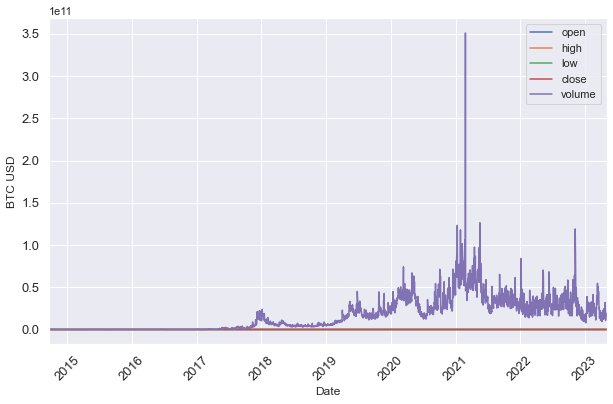

In [11]:
# All columns in dataframe 
df.plot(ylabel= 'BTC USD', fontsize= 13, figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Volume BTC.png", transparent = True, dpi=150)
plt.show()

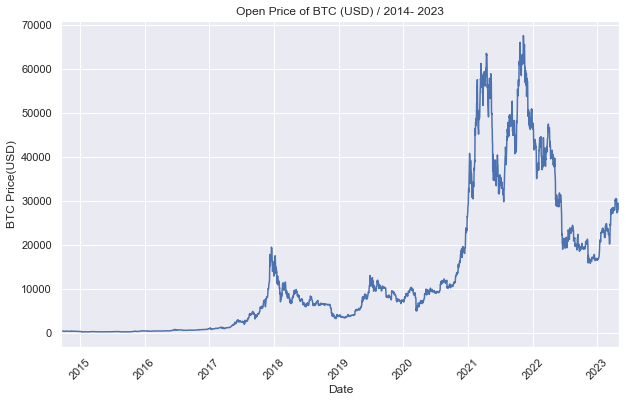

In [12]:
# Open price of Bitcoin from 2014 to 2023

df['open'].plot(ylabel='BTC Price(USD)', title='Open Price of BTC (USD) / 2014- 2023', figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Open Price BTC.png", transparent = True, dpi=150)
plt.show()

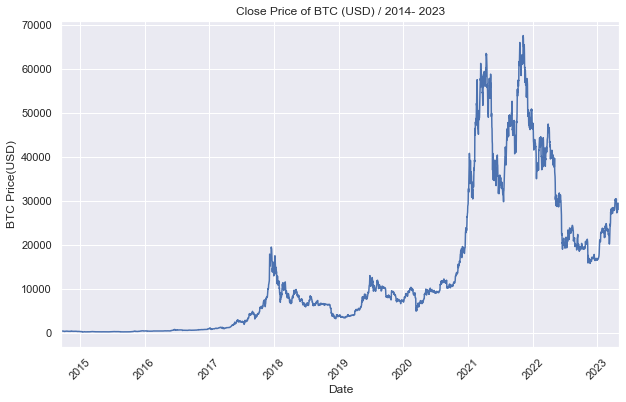

In [19]:
# Close price of Bitcoin from 2014 to 2023

df['close'].plot(ylabel='BTC Price(USD)', title='Close Price of BTC (USD) / 2014- 2023', figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Close Price BTC.png", transparent = True, dpi=150)
plt.show()

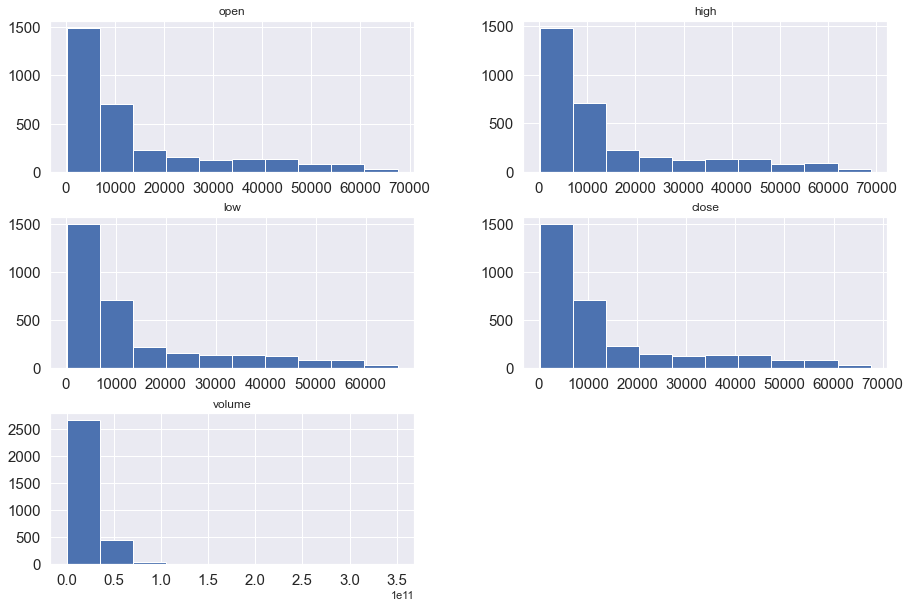

In [18]:
# Checking for normality for all columns (for stat testing)

df.hist(xlabelsize= 15, ylabelsize= 15, figsize=(15, 10))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Normality All Columns.png", transparent = True, dpi=150)
plt.show()

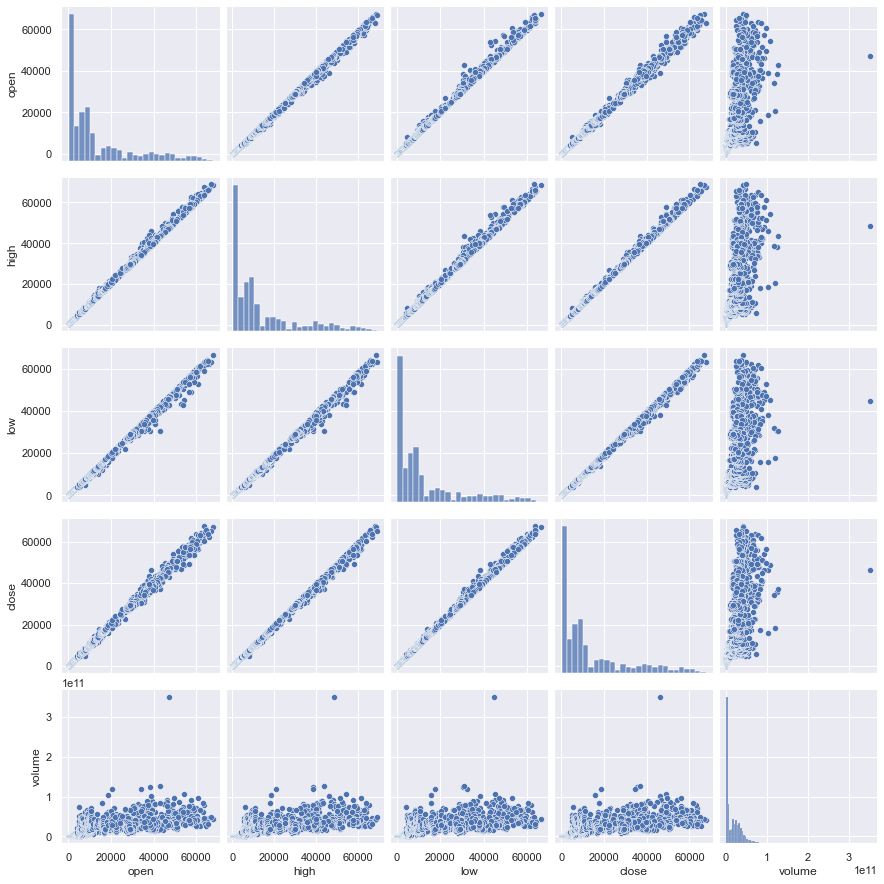

In [10]:
# Correlation all columns 
# All that straight lines, all these prices are incredibely positive correlated with each other
# That shows that the high price is really correlated with the open price,
# Low price is really correlated the open price,
# Close price is really correlated the open price,

sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=df)

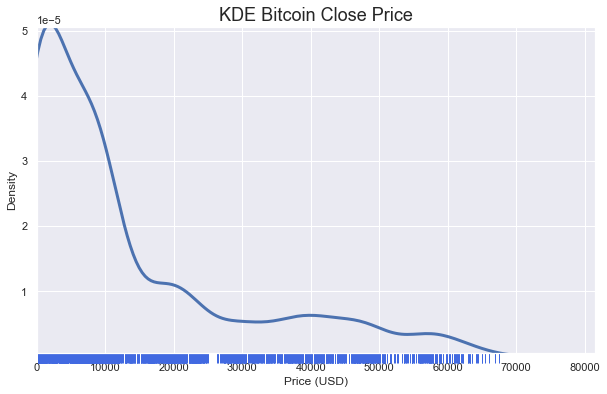

In [20]:
# Density of close price
# KDE distribution of Bitcoin closing price

fig, ax = plt.subplots(figsize=(10, 6))
p = sns.kdeplot(data=df, x='close', linewidth=3, ax=ax)
r = sns.rugplot(data=df, x='close', ax=ax, c='royalblue',
                height=-.03, clip_on=False)

#Save the figure
plt.savefig("KDE BTC Close Price.png", transparent = True, dpi=150)

p.set(xlim=(0, None))
p.set_title('KDE Bitcoin Close Price', fontsize=18)
p.set_xlabel('Price (USD)');

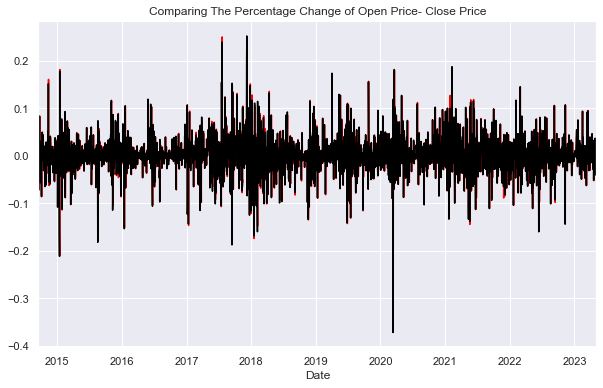

In [21]:
#Volatility
# The percentage increase both open and close price 
# daily return, changing of open price 
# changing of close price

df['open_change'] = (df['open']/df['open'].shift(1)) -1
df['close_change'] = (df['close']/df['close'].shift(1)) -1

df['open_change'].plot(title = 'Comparing The Percentage Change of Open Price- Close Price', color='red', figsize = (10, 6))
df['close_change'].plot(color='black')

#Save the figure
plt.savefig("Compare % change Open-Close Price.png", transparent = True, dpi=150)

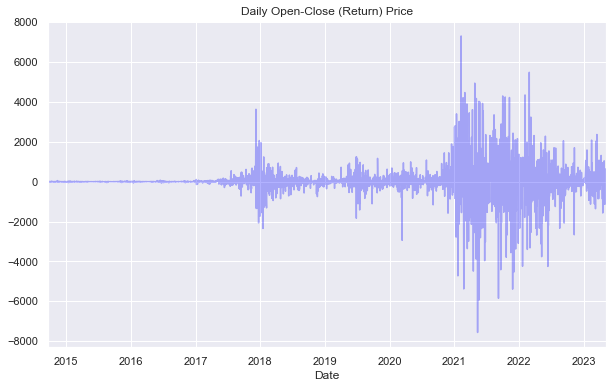

In [22]:
# Daily open close (return) price

df['close-open'] = (df['close'] - df['open'])                
df['close-open'].plot(title = 'Daily Open-Close (Return) Price', alpha = 0.3, color='blue', figsize = (10,6))

#Save the figure
plt.savefig("Daily Open-Close Price.png", transparent = True, dpi=150)

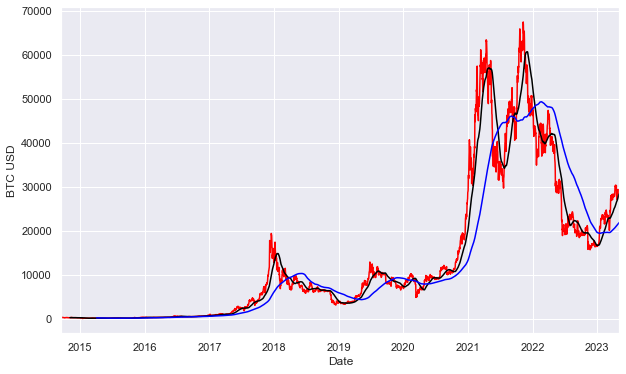

In [23]:
# Check any trend or pattern we can take the help of a 50-day 200-day average

df['MA50'] = df['close'].rolling(50).mean()
df['MA200'] = df['close'].rolling(200).mean()

df['close'].plot(ylabel= 'BTC USD', color='red', figsize = (10,6))
df['MA50'].plot(color='black')
df['MA200'].plot(color='blue')

#Save the figure
plt.savefig("50-day 200-day Avg-Trend.png", transparent = True, dpi=150)

In [24]:
# We created new columns for future 
# open-change
# close-change
# open-close = Daily return price
# MA50 = Any trend 50-day average
# MA200 = Any trend 50-day average
df

,open,high,low,close,volume,open_change,close_change,close-open,MA50,MA200
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,-8.529999,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.019328,-0.071926,-32.419983,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.071700,-0.069843,-29.307007,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.069394,0.035735,14.230988,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.033983,-0.024659,-9.263977,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,-0.000630,-0.040222,-1135.535157,28169.098789,21808.973936
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,-0.039002,0.020966,593.361328,28258.758867,21856.448340
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518,0.021124,0.011359,325.814453,28343.963555,21906.141709


In [25]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', length=3153, freq=None)

# Check Stationary
* I will use daily close price of Bitcoin for prediction, I don't need to resample it because it's already daily price

* I will check the stationary as measuring p value thanks to the Dickey Fuller test. 

* If p value is less than alpha my data is stationary. If not I will use differencing to make it stationary.

In [26]:
# Create close_ts, close column with date

close_ts = df['close']
close_ts

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2023-05-01    28091.568359
2023-05-02    28680.537109
2023-05-03    29006.308594
2023-05-04    28847.710938
2023-05-05    29495.498047
Name: close, Length: 3153, dtype: float64

In [27]:
# Check p value of our close_ts and check if it is stationary

# 1. Test Statistic, 
# 2. p-value, 
# 3. #Lags Used,
# 4. Number of Observations Used
# 5. Critical values
adfuller(close_ts)

(-1.5336037381203826,
 0.5168274345848825,
 29,
 3123,
 {'1%': -3.432445639802861,
  '5%': -2.8624659237441654,
  '10%': -2.567262891276225},
 50491.441309516646)

In [28]:
p_val = adfuller(close_ts[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is stationary.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 0.5167428383380318,
Reject the null hypothesis that the differenced data is NOT stationary.


In [29]:
seasonal_decomp = seasonal_decompose(close_ts)
seasonal_decomp.seasonal

Date
2014-09-17    23.816408
2014-09-18   -21.324092
2014-09-19   -11.833334
2014-09-20     4.752443
2014-09-21    -0.710088
                ...    
2023-05-01     9.849578
2023-05-02    -4.550914
2023-05-03    23.816408
2023-05-04   -21.324092
2023-05-05   -11.833334
Name: seasonal, Length: 3153, dtype: float64

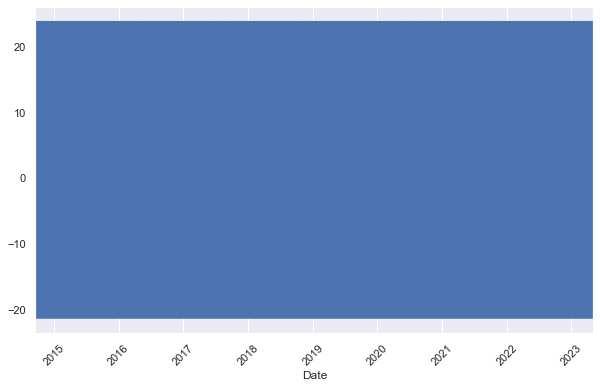

In [32]:

#fig, ax = plt.subplots(figsize=(12, 8))
#ax.plot(seasonal_decomp.seasonal)
#ax.set_title('Seasonality')
#plt.legend();

# Pratic way
seasonal_decomp.seasonal.plot(figsize=(10,6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Seasonal Decomp.png", transparent = True, dpi=150)

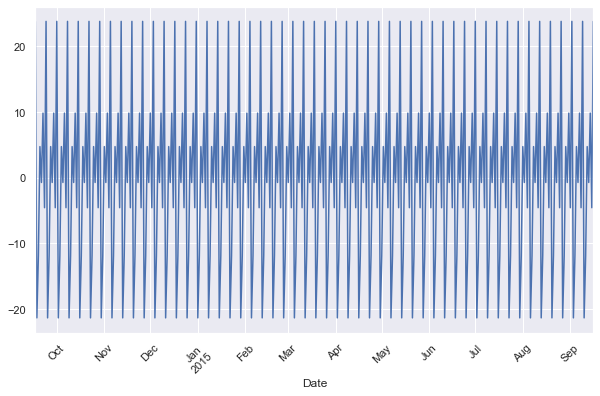

In [37]:
# During 1 year monthly seasonality

seasonal_decomp.seasonal.iloc[:365].plot(fontsize= 11, figsize=(10,6))


# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Seasonality 1 Year.png", transparent = True, dpi=150)

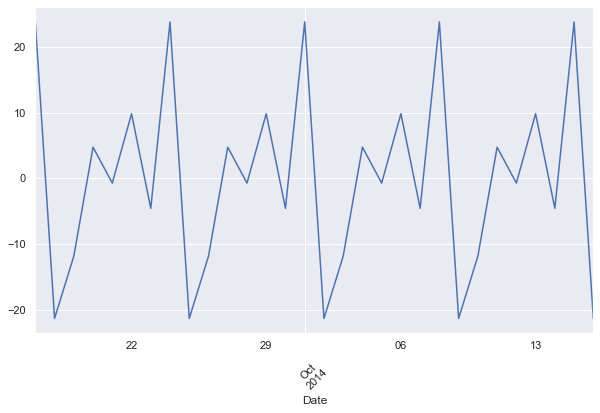

In [39]:
# 4 weeks seasonal visual in a month

seasonal_decomp.seasonal.iloc[:30].plot(figsize=(10,6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Seasonality 1 Month.png", transparent = True, dpi=150)

# Make Daily Close Price Stationary

* Open price and close price are very close each other. I will continue with closing price for prediction
* I should take a first difference of the data to remove this autocorrelation.
* Visualize the ACF and PACF to visual the differenced data

In [40]:
# Create transformation, difference the data
close_diff = close_ts.diff().dropna()

<Figure size 432x288 with 0 Axes>

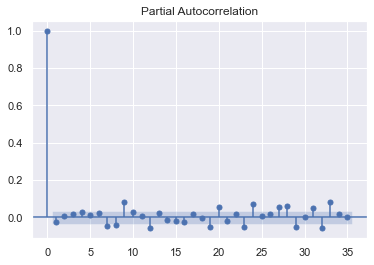

In [48]:
# PACF
# Decide for MA term, q

#Save the figure
plt.savefig("Partial Autocorrelation.png", transparent = True, dpi=150)

plot_pacf(close_diff, title='Partial Autocorrelation');

<Figure size 432x288 with 0 Axes>

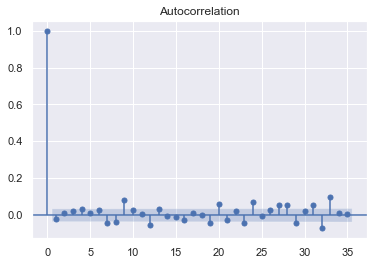

In [47]:
# ACF 
# Decide for AR, p

#Save the figure
plt.savefig("Autocorrelation.png", transparent = True, dpi=150)

plot_acf(close_diff, title='Autocorrelation',);


In [49]:
adfuller(close_diff)

(-9.356284064249085,
 8.043183725372062e-16,
 28,
 3123,
 {'1%': -3.432445639802861,
  '5%': -2.8624659237441654,
  '10%': -2.567262891276225},
 50476.6669353725)

In [50]:
p_val = adfuller(close_ts.diff()[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 8.043183725372062e-16,
Differenced data is STATIONARY.


# Train Test Split

In [56]:
# find the index which allows us to split off 20% of the data
cutoff = round(close_ts.shape[0]*.8)
cutoff

2522

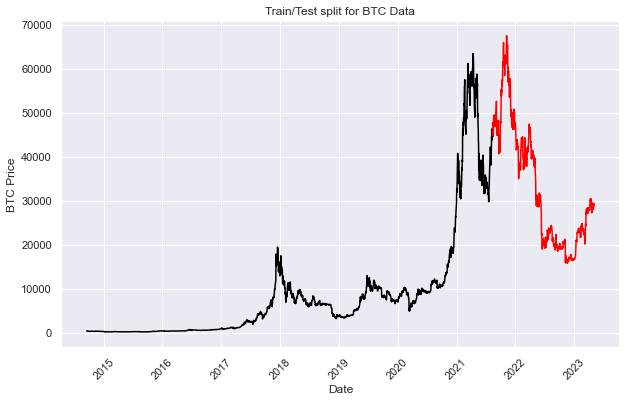

In [153]:
# Define train and test sets according to the index found above
# there is seasonality 

train = close_ts[:cutoff]
test = close_ts[cutoff:]

fig = plt.subplots(figsize=(10, 6))

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title("Train/Test split for BTC Data")

# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Train.png", transparent = True, dpi=150)

plt.show()

In [155]:
split = TimeSeriesSplit()

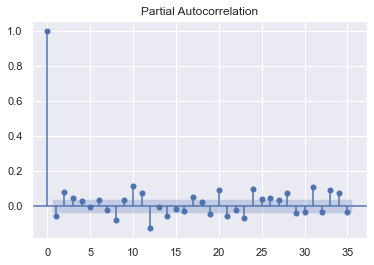

In [69]:
plot_pacf(train.diff().dropna());

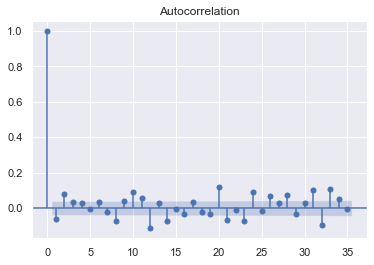

In [70]:
plot_acf(train.diff().dropna());

In [71]:
adfuller(train)

(-0.141508170957761,
 0.94514398273102,
 27,
 2494,
 {'1%': -3.4329747166494915,
  '5%': -2.862699584647827,
  '10%': -2.567387292022104},
 39277.689286977016)

In [72]:
p_val = adfuller(train)[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print("The differenced data is STATIONARY.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 0.94514398273102,
Reject the null hypothesis that the differenced data is NOT stationary.


In [73]:
# differenced train data 

adfuller(train.diff()[1:])

(-7.593387870691456,
 2.4969483722140082e-11,
 27,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 39250.57551502937)

In [74]:
# Check differenced train data p value

p_val = adfuller(train.diff()[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print("The differenced data is stationary.")
else:
    print("The null hypothesis that the differenced data is \
not stationary.")

The p-value in Dickey-Fuller statistical test is 2.4969483722140082e-11,
The differenced data is stationary.


In [112]:
ARMAmodel = SARIMAX(y, order = (1, 1, 1))

In [113]:
ARMAmodel = ARMAmodel.fit()

In [114]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

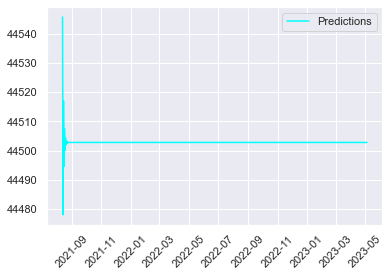

In [115]:
# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("ARMA model.png", transparent = True, dpi=150)

plt.plot(y_pred_out, color='cyan', label = 'Predictions')
plt.legend()


In [116]:
test

Date
2021-08-13    47793.320313
2021-08-14    47096.945313
2021-08-15    47047.003906
2021-08-16    46004.484375
2021-08-17    44695.359375
                  ...     
2023-05-01    28091.568359
2023-05-02    28680.537109
2023-05-03    29006.308594
2023-05-04    28847.710938
2023-05-05    29495.498047
Name: close, Length: 631, dtype: float64

In [111]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  17913.54320677826


The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events). 

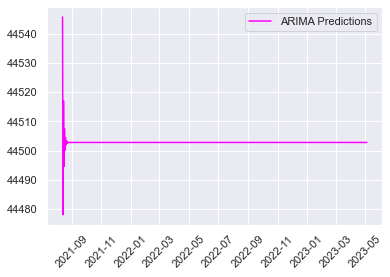

In [109]:
ARIMAmodel = ARIMA(y, order = (1, 1, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("ARIMA model.png", transparent = True, dpi=150)

plt.plot(y_pred_out, color='magenta', label = 'ARIMA Predictions')
plt.legend();


In [93]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  17913.54320677826


# SARIMAX MODEL 

In [117]:
p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, [1], q))]
print('Some parameter for SARIMA')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Some parameter for SARIMA
SARIMAX: (0, 1, 0) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (0, 1, 2, 7)
SARIMAX: (0, 1, 0) x (1, 1, 0, 7)
SARIMAX: (0, 1, 0) x (1, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 1, 2, 7)
SARIMAX: (0, 1, 0) x (2, 1, 0, 7)
SARIMAX: (0, 1, 0) x (2, 1, 1, 7)
SARIMAX: (0, 1, 0) x (2, 1, 2, 7)
SARIMAX: (0, 1, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 1) x (0, 1, 1, 7)
SARIMAX: (0, 1, 1) x (0, 1, 2, 7)
SARIMAX: (0, 1, 1) x (1, 1, 0, 7)
SARIMAX: (0, 1, 1) x (1, 1, 1, 7)
SARIMAX: (0, 1, 1) x (1, 1, 2, 7)
SARIMAX: (0, 1, 1) x (2, 1, 0, 7)
SARIMAX: (0, 1, 1) x (2, 1, 1, 7)
SARIMAX: (0, 1, 1) x (2, 1, 2, 7)
SARIMAX: (0, 1, 2) x (0, 1, 0, 7)
SARIMAX: (0, 1, 2) x (0, 1, 1, 7)
SARIMAX: (0, 1, 2) x (0, 1, 2, 7)
SARIMAX: (0, 1, 2) x (1, 1, 0, 7)
SARIMAX: (0, 1, 2) x (1, 1, 1, 7)
SARIMAX: (0, 1, 2) x (1, 1, 2, 7)
SARIMAX: (0, 1, 2) x (2, 1, 0, 7)
SARIMAX: (0, 1, 2) x (2, 1, 1, 7)
SARIMAX: (0, 1, 2) x (2, 1, 2, 7)
SARIMAX: (1, 1, 0) x (0, 1, 0, 7)
SARIMAX: (1, 1, 0) x (

In [118]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('No result')
            continue

SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:41531.337400906385
SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:39741.44906052228
SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:39619.3620800682
SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:40799.91064116302
SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:39740.15027808932
SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:39571.33724634838
SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:40406.2651449705
SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:39638.959954718935
SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:39560.042103865395
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:41513.952320312645
SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:39657.38992020521
SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:39553.38629873101
SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:40795.06108718642
SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:39657.60514838805
SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:39552.6475788532
SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:40393.911742399534
SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:39570.06761006535
SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:39540.013407444
SARIMAX(0, 1, 2)x(0, 1, 0, 7

## The best AIC results :
> SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:39520.70211093953

> SARIMAX(0, 1, 2)x(0, 1, 2, 7) - AIC:39522.605371212776

> SARIMAX(2, 1, 0)x(2, 1, 1, 7) - AIC:39529.50606476146

AIC : 39520.70211093953


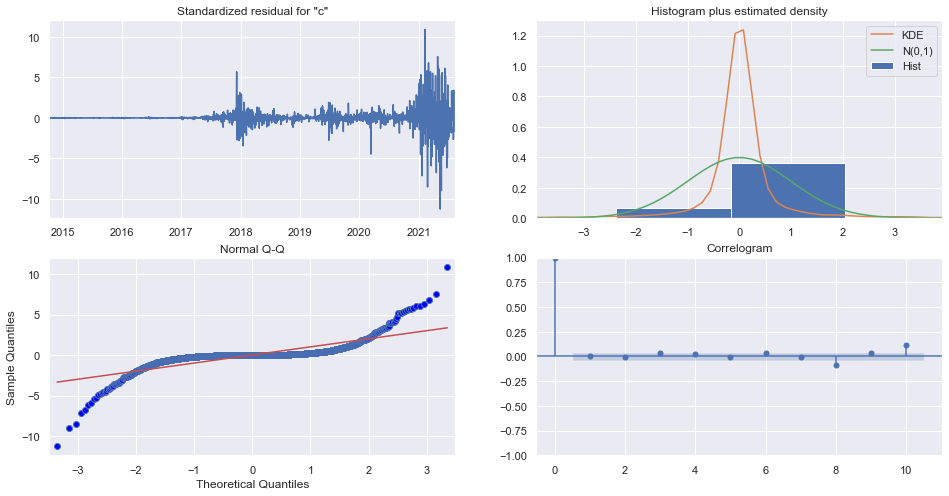

In [138]:
# SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:39520.70211093953

SARIMAXmodel =SARIMAX(train,
                      order=(0, 1, 2),
                      seasonal_order=(1, 1, 2, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False, ).fit()

print('AIC :', SARIMAXmodel.aic)
SARIMAXmodel.plot_diagnostics(figsize=(16, 8))
plt.show()

In [141]:
y_pred_sar = SARIMAXmodel.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_pred_sar))

653.1690183081334

In [ ]:
y_hat_train = sar_model.predict(typ='levels')
y_hat_test = sar_model.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [ ]:
# Let's zoom in on test
y_hat_test = sar_model
fig, ax = plt.subplots()

ax.plot(test, label='true')
ax.plot(y_hat_test, label='pred')

plt.legend();

In [88]:
sar_model.params

ma.L1           -0.025655
ma.L2            0.008638
ar.S.L7         -0.901195
ma.S.L7         -0.119047
ma.S.L14        -0.880634
sigma2      630448.482375
dtype: float64

# TEST 

In [65]:
print(test.index)
print(test.index[0])
print(test.index[-1])

DatetimeIndex(['2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-21', '2021-08-22',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', length=631, freq=None)
2021-08-13 00:00:00
2023-05-05 00:00:00


# FORECAST

In [123]:
sar_model = SARIMAX(close_ts,
                    order=(0, 1, 2),
                    seasonal_order=(1, 1, 2, 7),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

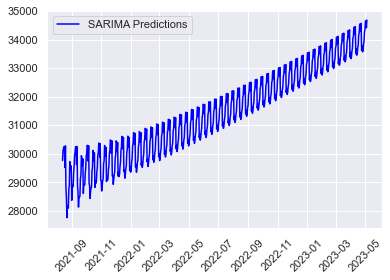

In [149]:
SARIMAXmodel = SARIMAX(close_ts, order = (0, 1, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))

# Confidence interval construction for the predicted mean
y_pred_df = y_pred.conf_int(alpha = 0.05) 

y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

y_pred_df.index = test.index

y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("SARIMAX Forecast.png", transparent = True, dpi=150)

plt.legend()

In [135]:
365*10

3650

In [136]:
forecast = sar_model.forecast(steps=3650)

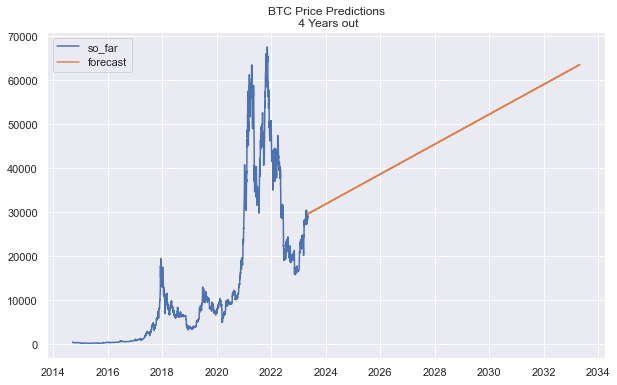

In [137]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(close_ts, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('BTC Price Predictions\n 4 Years out')

plt.legend();

In [ ]:
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [79]:
profit = df['close-open'] 
profit

Date
2014-09-17      -8.529999
2014-09-18     -32.419983
2014-09-19     -29.307007
2014-09-20      14.230988
2014-09-21      -9.263977
                 ...     
2023-05-01   -1135.535157
2023-05-02     593.361328
2023-05-03     325.814453
2023-05-04    -183.593750
2023-05-05     640.322266
Name: close-open, Length: 3153, dtype: float64

In [80]:
adfuller(profit)

(-9.241381718637344,
 1.5791549785112896e-15,
 28,
 3124,
 {'1%': -3.4324449684310445,
  '5%': -2.8624656272139637,
  '10%': -2.5672627334083655},
 50512.10999504723)

In [82]:
p_val = adfuller(profit[1:])[1]
print(f"The p-value in Dickey-Fuller statistical test is {p_val},")

if p_val < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Reject the null hypothesis that the differenced data is \
NOT stationary.")

The p-value in Dickey-Fuller statistical test is 1.5929127069870235e-15,
Differenced data is STATIONARY.


Date
2014-09-17    25.853813
2014-09-18   -44.862248
2014-09-19     5.708070
2014-09-20    17.539482
2014-09-21    -3.333076
                ...    
2023-05-01    12.674050
2023-05-02   -13.580092
2023-05-03    25.853813
2023-05-04   -44.862248
2023-05-05     5.708070
Name: seasonal, Length: 3153, dtype: float64


<AxesSubplot:xlabel='Date'>

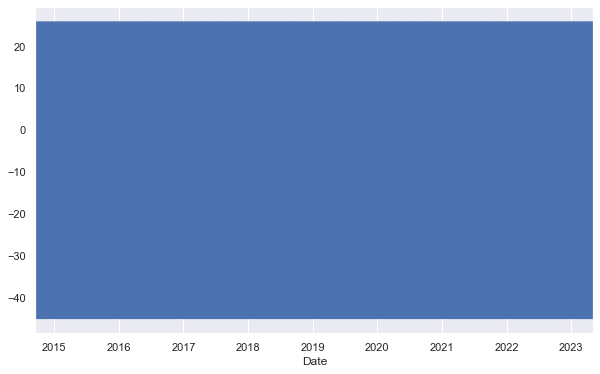

In [179]:
seas_decomp = seasonal_decompose(profit)
print(seas_decomp.seasonal)
seas_decomp.seasonal.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

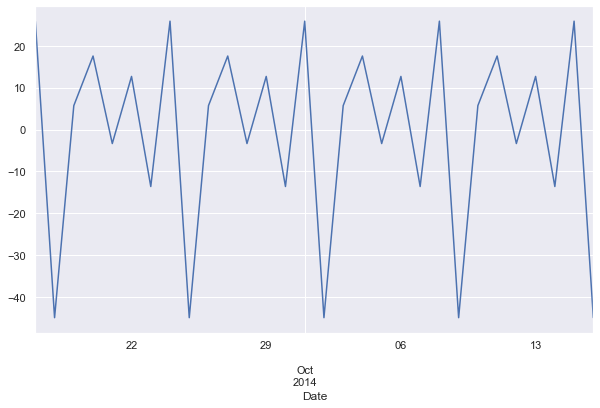

In [181]:
seas_decomp.seasonal.iloc[: 30].plot(figsize=(10,6))

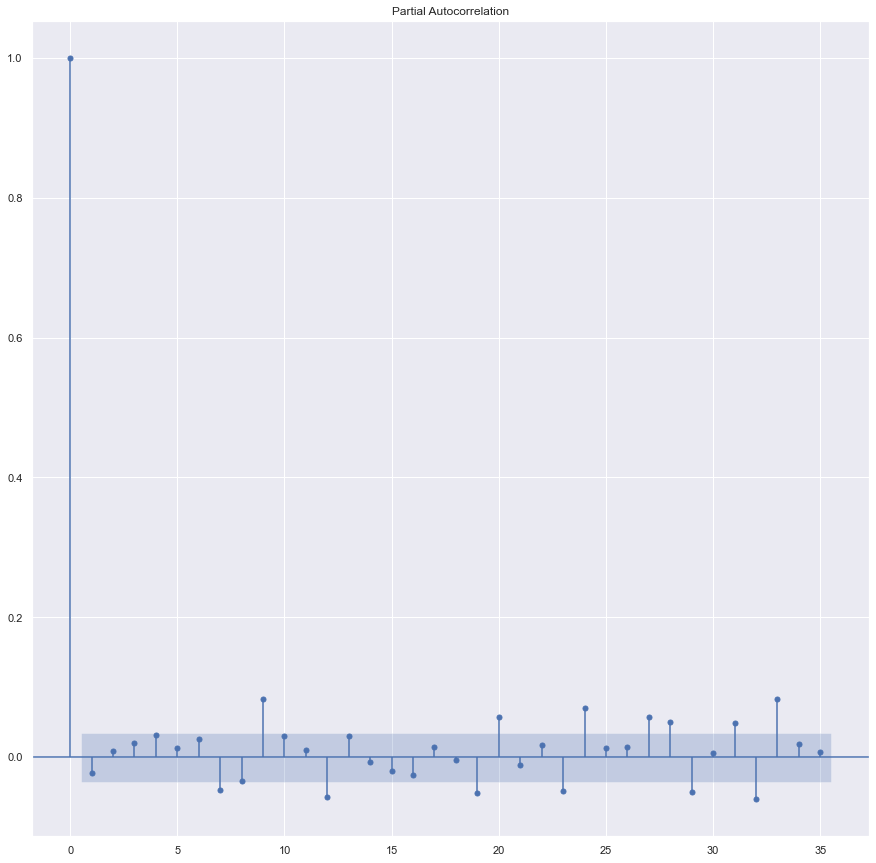

In [186]:
plot_pacf(profit, title='Partial Autocorrelation');

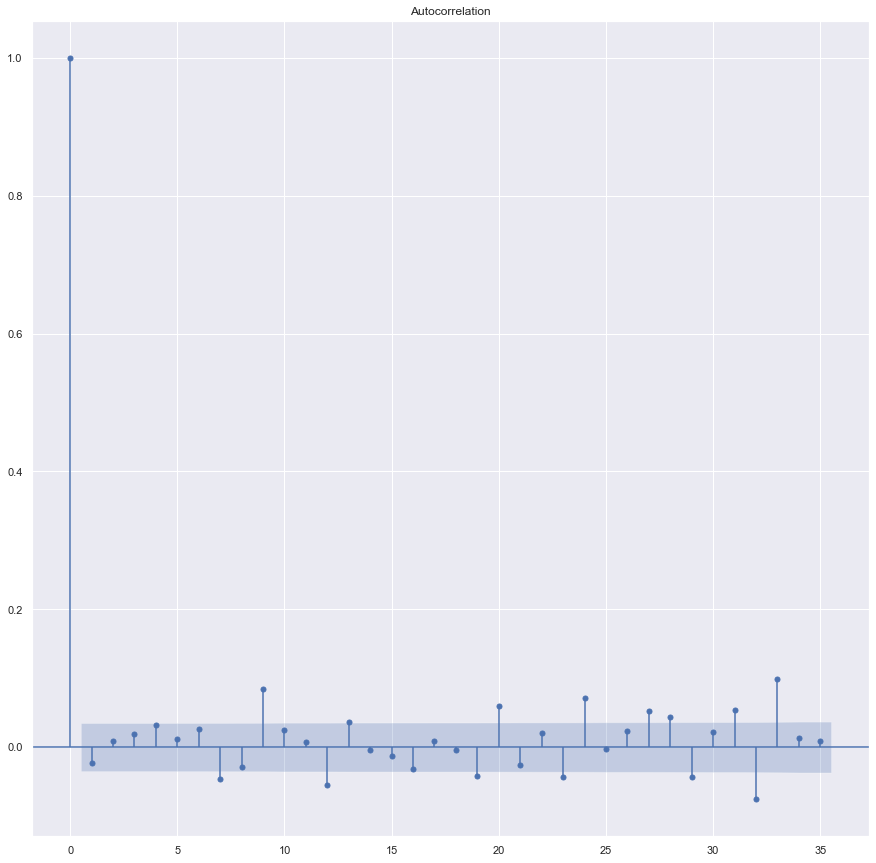

In [184]:
plot_acf(profit, title='Autocorrelation',);

In [187]:
# find the index which allows us to split off 20% of the data
cutoff1 = round(profit.shape[0]*.8)
cutoff1

2522

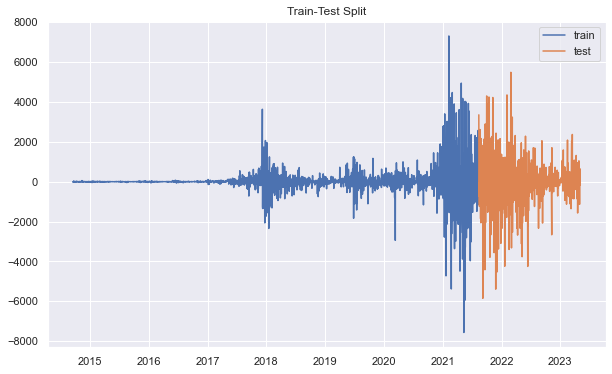

In [188]:
# Define train and test sets according to the index found above
# there is seasonality 

train1= profit[:cutoff1]
test1 = profit[cutoff1:]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train1, label='train')
ax.plot(test1, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [189]:
split = TimeSeriesSplit()

In [190]:
train1

Date
2014-09-17      -8.529999
2014-09-18     -32.419983
2014-09-19     -29.307007
2014-09-20      14.230988
2014-09-21      -9.263977
                 ...     
2021-08-08    -776.320312
2021-08-09    2573.476563
2021-08-10    -695.816406
2021-08-11      -6.066406
2021-08-12   -1148.589843
Name: close-open, Length: 2522, dtype: float64

# SARIMAX MODEL

In [193]:
p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, [1], q))]
print('Some combinations for SARIMA')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Some combinations for SARIMA
SARIMAX: (0, 1, 0) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (0, 1, 2, 7)
SARIMAX: (0, 1, 0) x (1, 1, 0, 7)
SARIMAX: (0, 1, 0) x (1, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 1, 2, 7)
SARIMAX: (0, 1, 0) x (2, 1, 0, 7)
SARIMAX: (0, 1, 0) x (2, 1, 1, 7)
SARIMAX: (0, 1, 0) x (2, 1, 2, 7)
SARIMAX: (0, 1, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 1) x (0, 1, 1, 7)
SARIMAX: (0, 1, 1) x (0, 1, 2, 7)
SARIMAX: (0, 1, 1) x (1, 1, 0, 7)
SARIMAX: (0, 1, 1) x (1, 1, 1, 7)
SARIMAX: (0, 1, 1) x (1, 1, 2, 7)
SARIMAX: (0, 1, 1) x (2, 1, 0, 7)
SARIMAX: (0, 1, 1) x (2, 1, 1, 7)
SARIMAX: (0, 1, 1) x (2, 1, 2, 7)
SARIMAX: (0, 1, 2) x (0, 1, 0, 7)
SARIMAX: (0, 1, 2) x (0, 1, 1, 7)
SARIMAX: (0, 1, 2) x (0, 1, 2, 7)
SARIMAX: (0, 1, 2) x (1, 1, 0, 7)
SARIMAX: (0, 1, 2) x (1, 1, 1, 7)
SARIMAX: (0, 1, 2) x (1, 1, 2, 7)
SARIMAX: (0, 1, 2) x (2, 1, 0, 7)
SARIMAX: (0, 1, 2) x (2, 1, 1, 7)
SARIMAX: (0, 1, 2) x (2, 1, 2, 7)
SARIMAX: (1, 1, 0) x (0, 1, 0, 7)
SARIMAX: (1, 1, 0) 

In [192]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1=SARIMAX(train1,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod1.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('No result')
            continue

SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:43387.53290846305
SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:41778.041558794845
SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:41665.85880551294
SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:42680.13367252463
SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:41723.70669977514
SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:41562.93319694339
SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:42340.62256892729
SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:41582.58981165615
SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:41521.15627197066
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:41590.35408062121
SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:39672.65141151598
SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:39568.730971753
SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:41062.762518813586
SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:39672.736047497354
SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:39936.53297438039
SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:40789.58463973424
SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:39585.70665487596
SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:40373.50724631795
SARIMAX(0, 1, 2)x(0, 1, 0, 